In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

%matplotlib inline
%config InlineBackend.figure_formats = 'svg'

warnings.filterwarnings('ignore')

In [2]:
pip install lazypredict

In [67]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 6.9 MB/s eta 0:00:00


In [3]:
table = {
    "columns": ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],  # column names

    "descriptions": [
        "0 = no diabetes, 1 = diabetes",
        "0 = no high BP, 1 = high BP",
        "0 = no high cholesterol, 1 = high cholesterol",
        "0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years",
        "Body Mass Index",
        "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes",
        "(Ever told) you had a stroke. 0 = no, 1 = yes",
        "Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes",
        "Physical activity in past 30 days - not including job. 0 = no, 1 = yes",
        "Consume fruit 1 or more times per day. 0 = no, 1 = yes",
        "Consume vegetables 1 or more times per day. 0 = no, 1 = yes",
        "Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (0, 1)",
        "Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0, 1)",
        "Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0, 1)",
        "Would you say that in general your health is: rate (1 ~ 5)",
        "Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)",
        "Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)",
        "Do you have serious difficulty walking or climbing stairs? (0, 1)",
        "Indicate sex of respondent (0, 1) (Female or Male)",
        "Fourteen-level age category (1 ~ 14)",
        "What is the highest grade or year of school you completed? (1 ~ 6)",
        "Is your annual household income from all sources: (If respondent refuses at any income level, code 'Refused.') (1 ~ 8)"
    ] # desc based on desc on kaggle
}
tabledf = pd.DataFrame(list(zip(table['columns'], table['descriptions'])), columns=["Column Name", "Description"])

# Display the DataFrame
print(tabledf)

             Column Name                                        Description
0        Diabetes_binary                      0 = no diabetes, 1 = diabetes
1                 HighBP                        0 = no high BP, 1 = high BP
2               HighChol      0 = no high cholesterol, 1 = high cholesterol
3              CholCheck  0 = no cholesterol check in 5 years, 1 = yes c...
4                    BMI                                    Body Mass Index
5                 Smoker  Have you smoked at least 100 cigarettes in you...
6                 Stroke      (Ever told) you had a stroke. 0 = no, 1 = yes
7   HeartDiseaseorAttack  Coronary heart disease (CHD) or myocardial inf...
8           PhysActivity  Physical activity in past 30 days - not includ...
9                 Fruits  Consume fruit 1 or more times per day. 0 = no,...
10               Veggies  Consume vegetables 1 or more times per day. 0 ...
11     HvyAlcoholConsump  Heavy drinkers (adult men having more than 14 ...
12         A

# EDA

In [4]:
Original_data =  pd.read_csv(r'diabetes_binary_health_indicators_BRFSS2015.csv') # diabetes_binary_health_indicators_BRFSS2015.csv file
df = pd.read_csv(r'/content/diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


data only contains integer values so convert the data into integers

In [8]:
df = df.astype(int)

In [9]:
df.duplicated().sum() # check duplicated data

np.int64(24206)

In [10]:
df.drop_duplicates(inplace = True) # remove duplicated data

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
unique_value_count = {}

for i in df.columns:
    unique_value_count[i] =  df[i].nunique()

pd.DataFrame(unique_value_count , index=['unique value count']).T

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


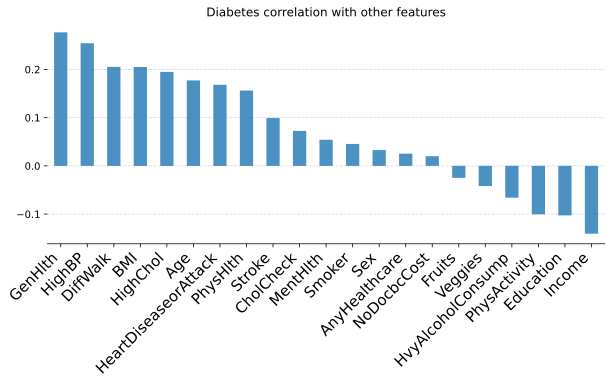

In [13]:
(df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(10, 4), title="Diabetes correlation with other features", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

# pairwise pearson correlation

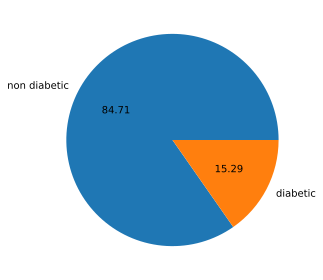

In [14]:
plt.pie(x= df.Diabetes_binary.value_counts() , labels=['non diabetic' , 'diabetic'] , autopct='%.02f');

## Diabetes * major features.

In [15]:
# Calculate the correlation of each column in df with the 'target' column

def visualize_feature(feature_name, df):
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Create a 3x1 grid of subplots

    # Pie chart
    df[feature_name].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
    axes[0].set_title(f'Pie Chart: {feature_name}')

    # Crosstab heatmap
    cross_tab = pd.crosstab(df[feature_name], df['Diabetes_binary'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
    axes[1].set_title(f'Cross-Tabulation: {feature_name} vs Diabetes_binary (%)')

    # Crosstab bar plot
    cross_tab.plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Bar Plot: {feature_name} vs Diabetes_binary')

    plt.tight_layout()
    plt.show()


### feature visualisation

HighBP

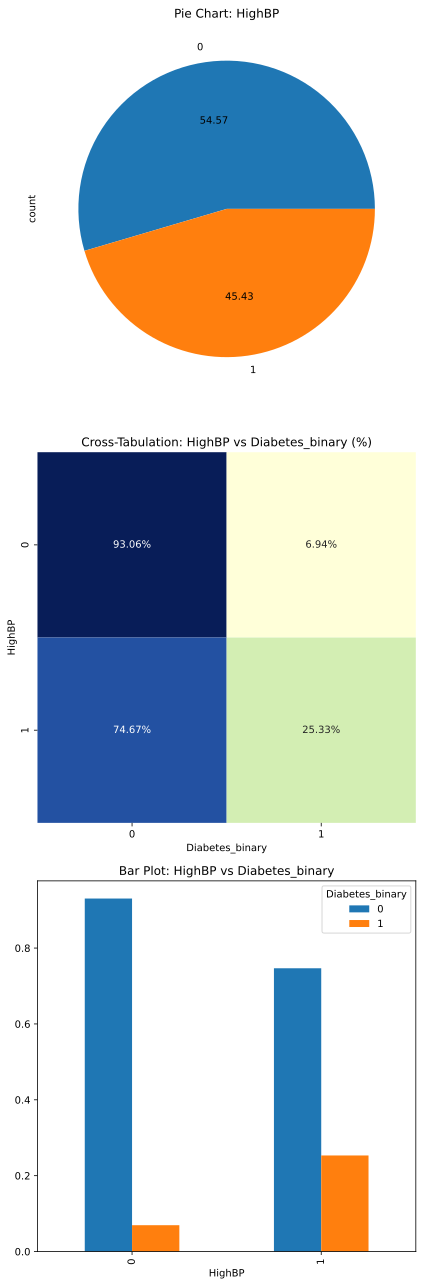

In [16]:
visualize_feature('HighBP' , df)

people with no high blood pressure (0) are at a lower risk of developing diabetes (diabetic(1), non-diabetic (0)) than people with high blood pressure (1)

we can see the higher the bp, higher the risk of developing diabetes

HighChol

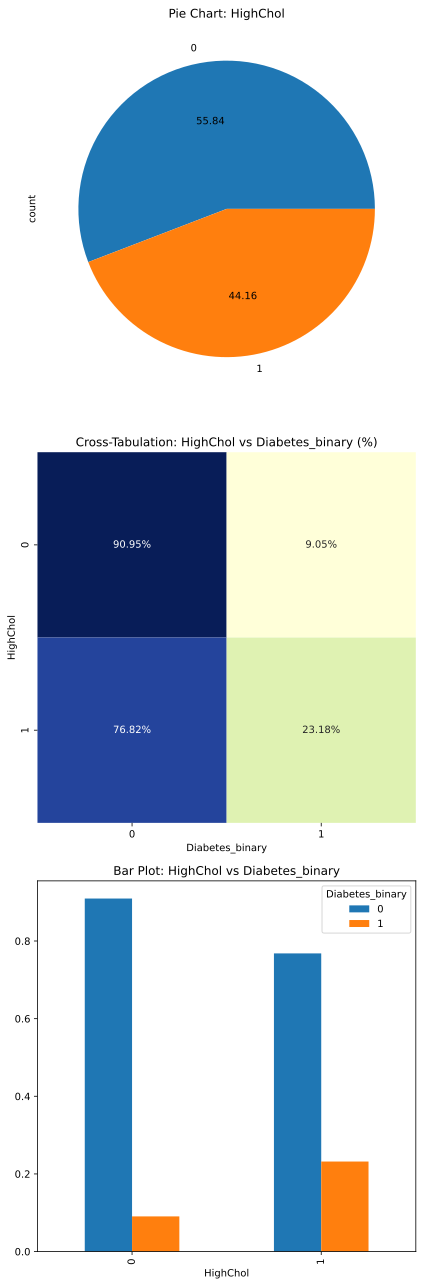

In [17]:
visualize_feature('HighChol' ,df)

higher cholestrol lvl increases chances of developing diabetes

### HighChol * HighBP vs Diabetes
why? highchol and highbp --> hypertension; one of the leading cause for diabetes

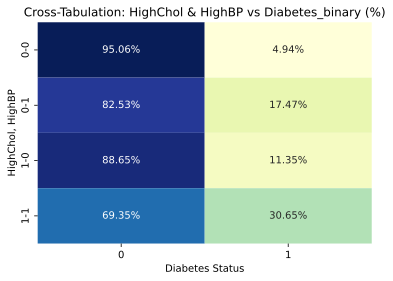

In [18]:
cross_tab = pd.crosstab([df.HighChol, df.HighBP], df.Diabetes_binary, normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2%", cbar=False)
plt.xlabel("Diabetes Status")
plt.ylabel("HighChol, HighBP")
plt.title("Cross-Tabulation: HighChol & HighBP vs Diabetes_binary (%)")
plt.show()


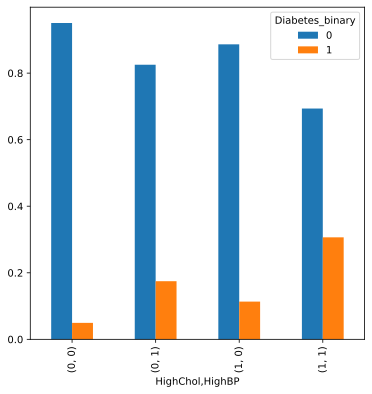

In [19]:
cross_tab.plot(kind = 'bar' , figsize = (6,6));

we can see that with both the features present, hypertension is a major cause in developing diabetes

BMI

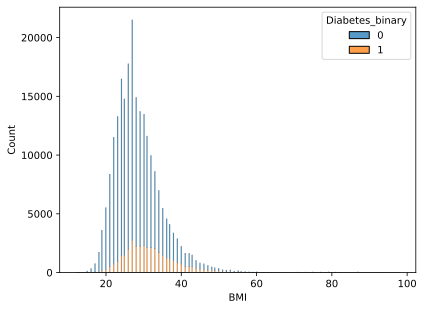

In [20]:
sns.histplot(df , x= df.BMI,hue=df.Diabetes_binary ,multiple='stack' );

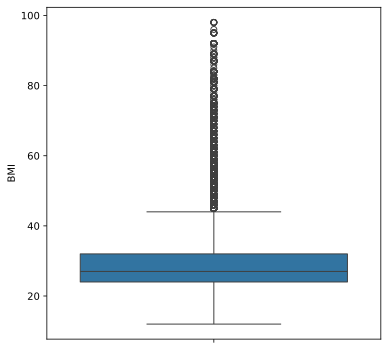

In [21]:
plt.figure(figsize = (6,6))
sns.boxplot(df.BMI);

The number of diabetes cases is highest in the BMI range of 20-50, but this is also the range with the most data points.

* This means that the relationship between BMI and diabetes is not clear-cut.

* It is possible that the higher number of diabetes cases in this range is simply due to the fact that there are more people in this range.

* However, it is also possible that there is a real relationship between BMI and diabetes in this range.

Smoker

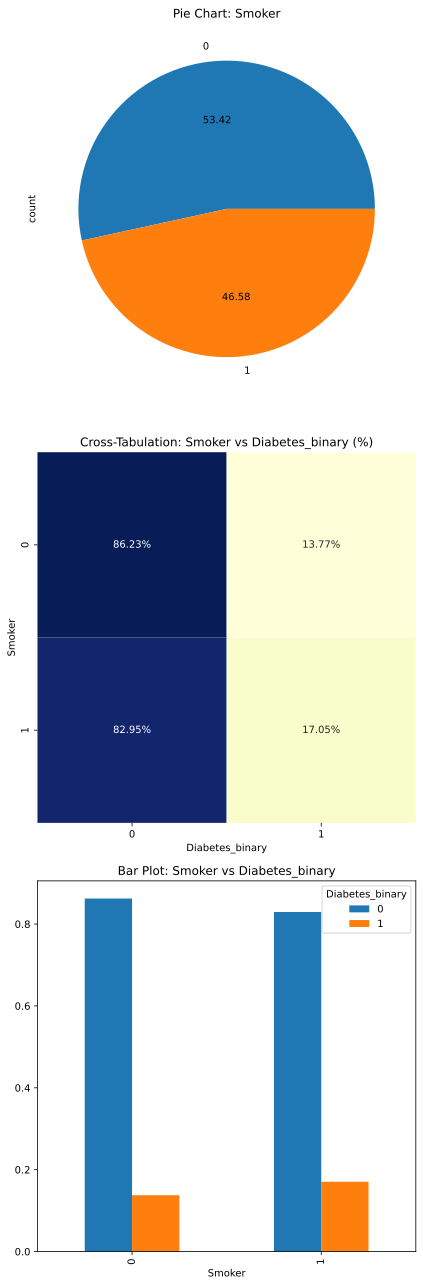

In [22]:
visualize_feature('Smoker' , df)

no significant effect with smoking

#### Smoker * HvyAlcoholConsump vs Diabetes
why? check effect of unhealthy habits on risk of diabetes

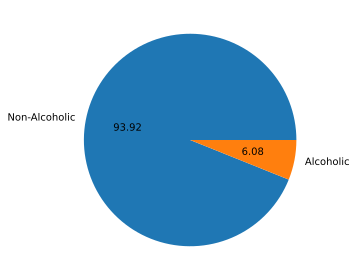

In [23]:
plt.pie(df.HvyAlcoholConsump.value_counts() , labels = ['Non-Alcoholic' , 'Alcoholic'] , autopct='%.2f');

Data (HvyAlcoholConsump) is highly imbalance can't withdraw information from it.

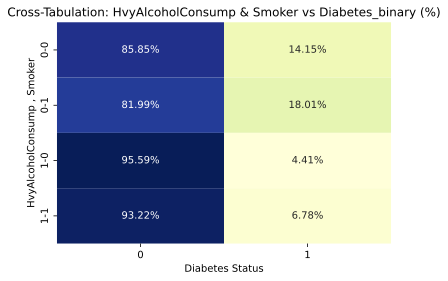

In [24]:
cross_tab = pd.crosstab([df.HvyAlcoholConsump, df.Smoker], df.Diabetes_binary, normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2%", cbar=False)
plt.xlabel("Diabetes Status")
plt.ylabel("HvyAlcoholConsump , Smoker")
plt.title("Cross-Tabulation: HvyAlcoholConsump & Smoker vs Diabetes_binary (%)")
plt.show()

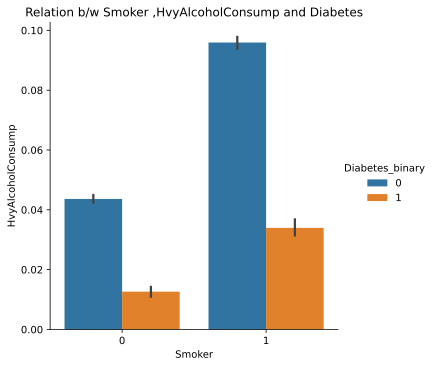

In [25]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = df , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes");

this combo significantly increase the risk of diabetes


**MentHlth,
PhysHlth,
DiffWalk,
Stroke,
HeartDiseaseorAttack,
GenHlth**

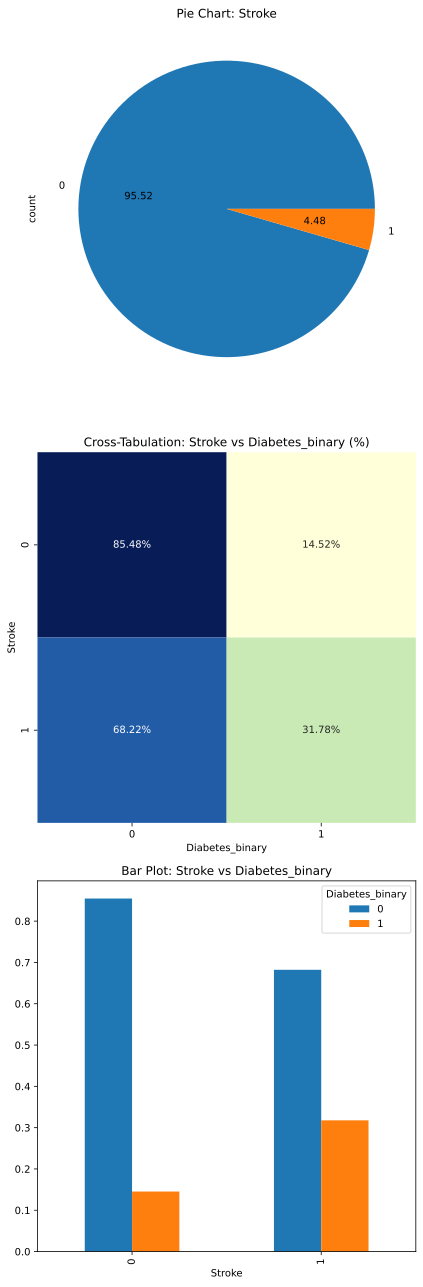

In [26]:
visualize_feature('Stroke' , df)

people with diabetes are twice as likely to have a stroke as people without diabetes

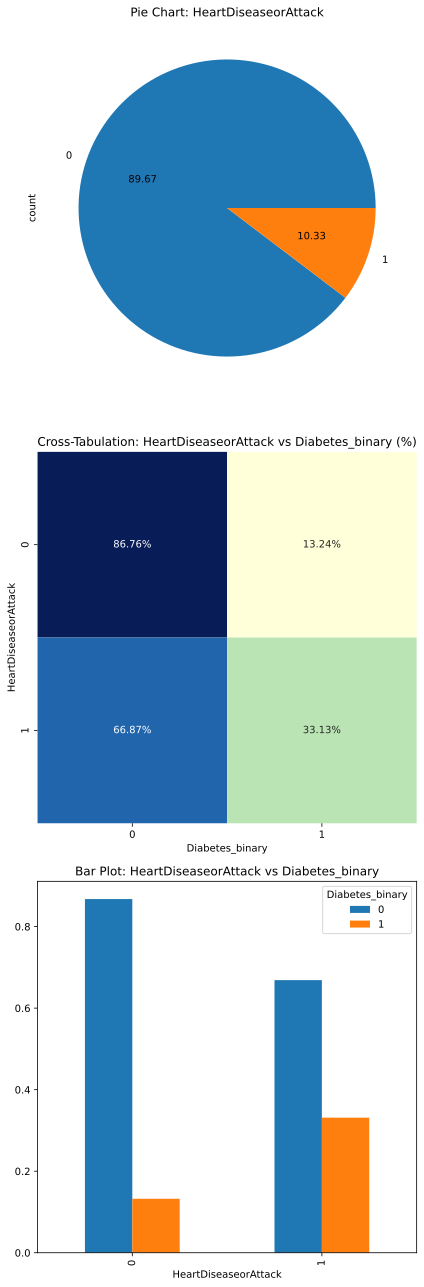

In [27]:
visualize_feature('HeartDiseaseorAttack' , df)

history of heart attack/ stroke are more likely to develop diabetes

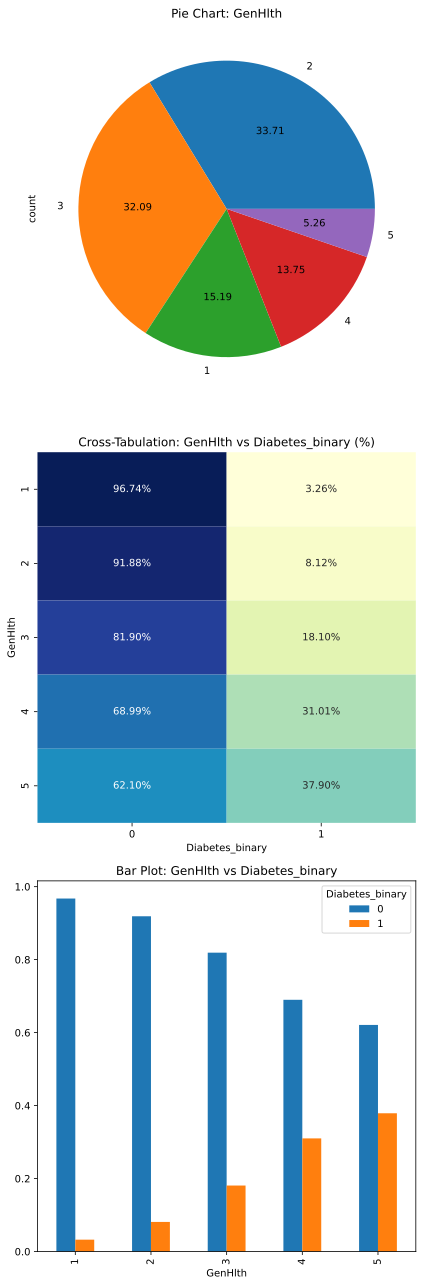

In [28]:
visualize_feature('GenHlth' , df)

all above general factors play roles, minor and major in diabetes development

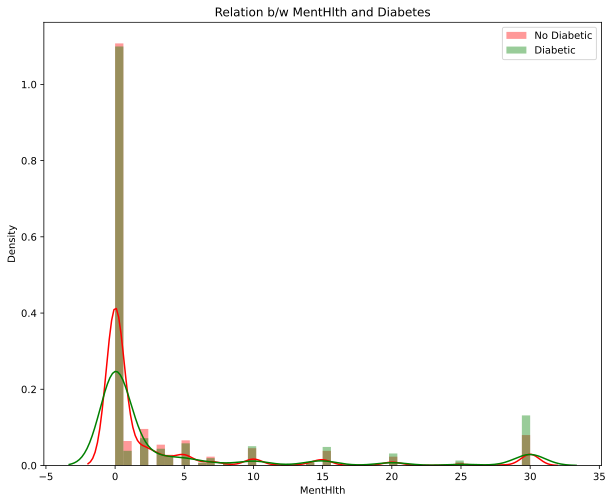

In [29]:
plt.figure(figsize=(10, 8))
warnings.filterwarnings('ignore')

sns.distplot(df.MentHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.MentHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()

poor mental health --> more risk

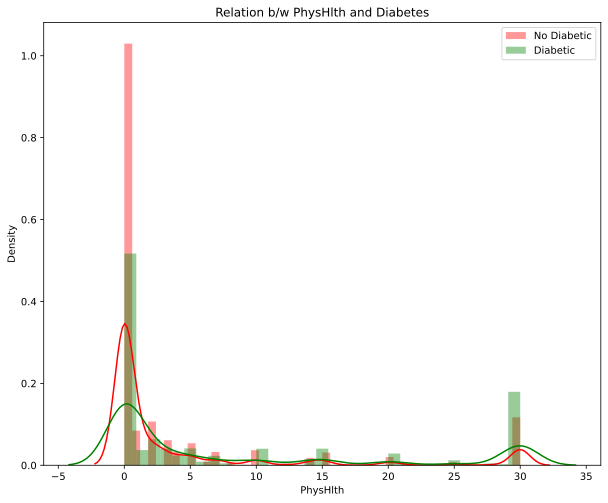

In [30]:
plt.figure(figsize=(10, 8))
warnings.filterwarnings('ignore')

sns.distplot(df.PhysHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.PhysHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w PhysHlth and Diabetes")

plt.legend()

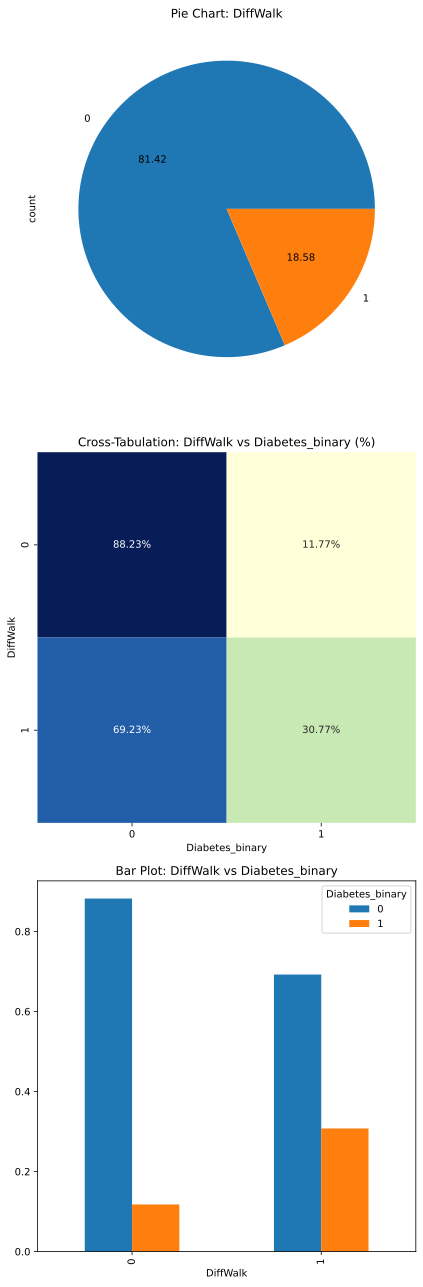

In [31]:
visualize_feature('DiffWalk' , df)

people with diabetes have more difficulty walking


**AnyHealthcare,
NoDocbcCost**

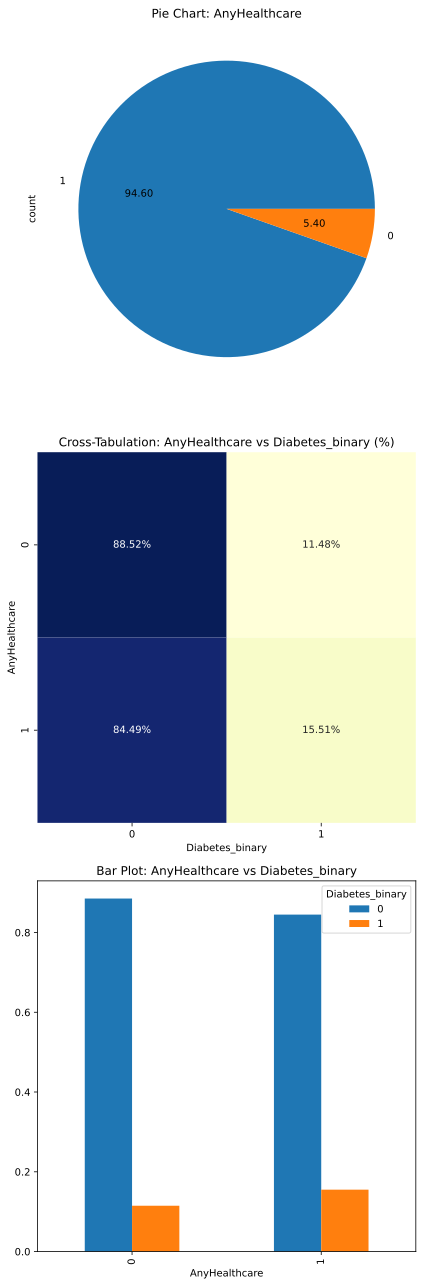

In [32]:
visualize_feature('AnyHealthcare' , df)

In [33]:
df.Diabetes_binary.corr(df.AnyHealthcare)

np.float64(0.02533133630772532)

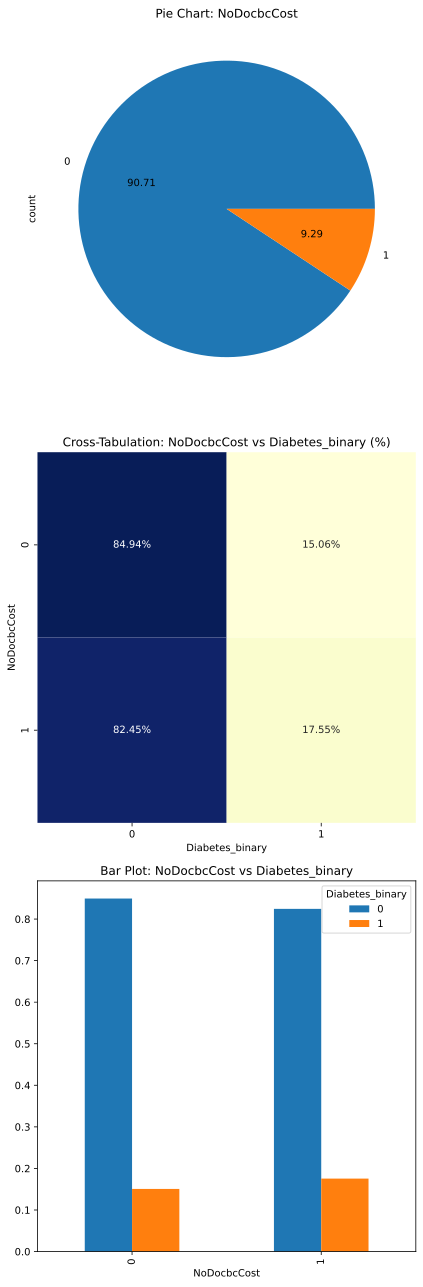

In [34]:
visualize_feature('NoDocbcCost' , df)

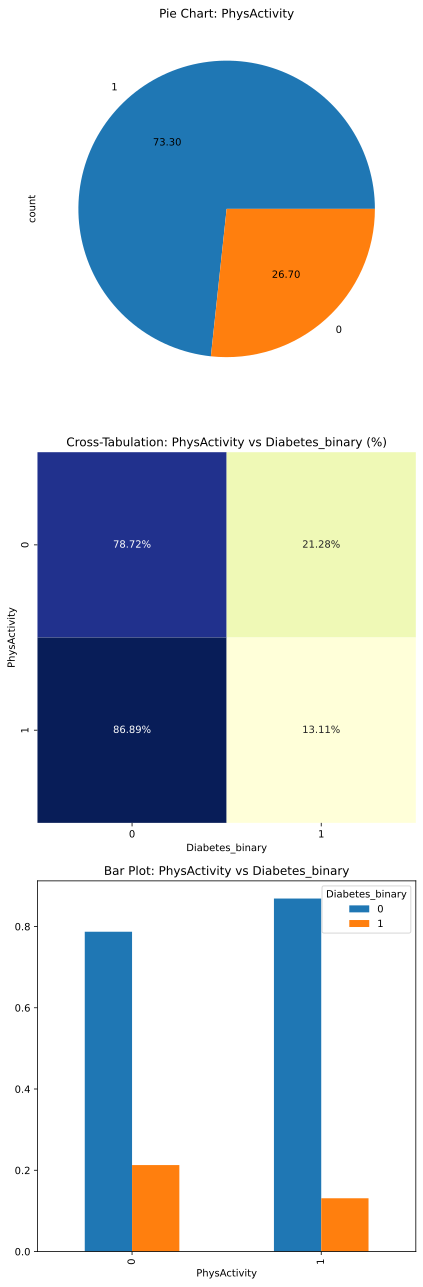

In [35]:
visualize_feature('PhysActivity' , df)

regular physical activity related with less chances of diabetes

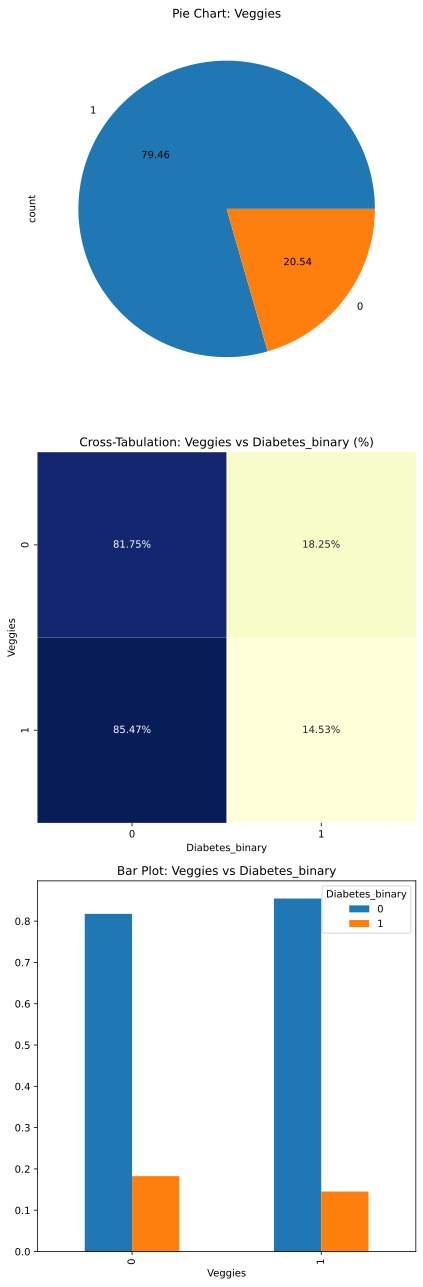

In [36]:
visualize_feature('Veggies' , df)

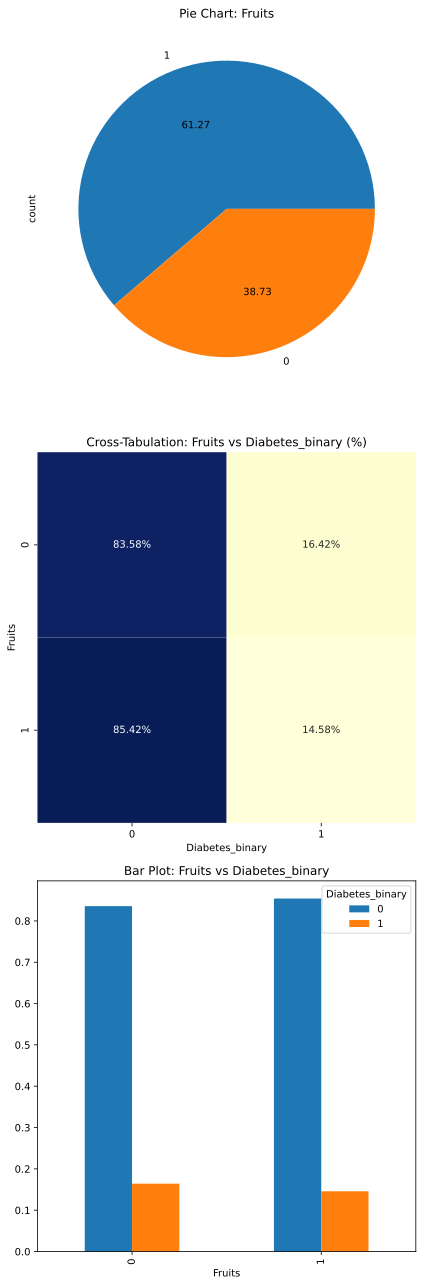

In [37]:
visualize_feature('Fruits' , df)

**Age ,
Sex ,
Education ,
Income**

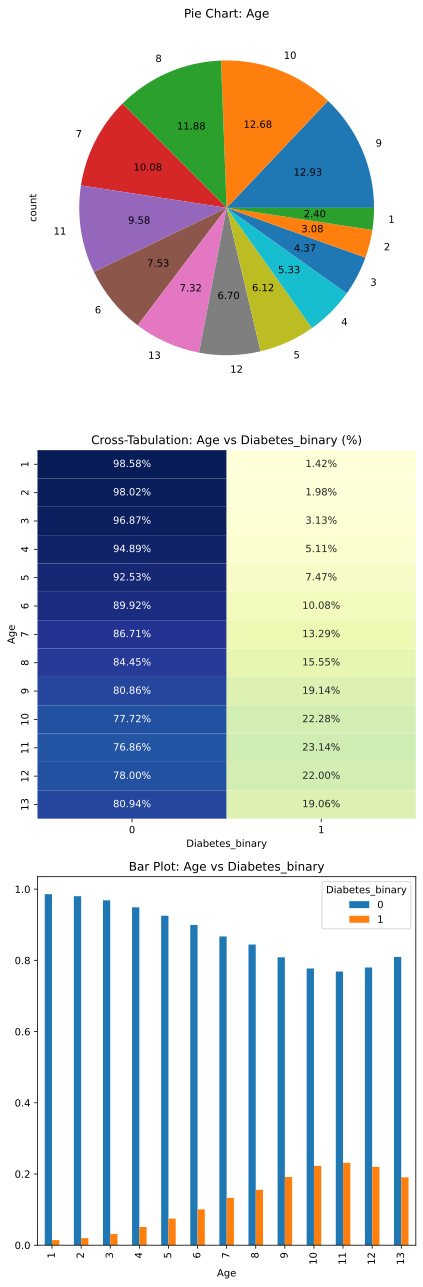

In [38]:
visualize_feature('Age' , df)

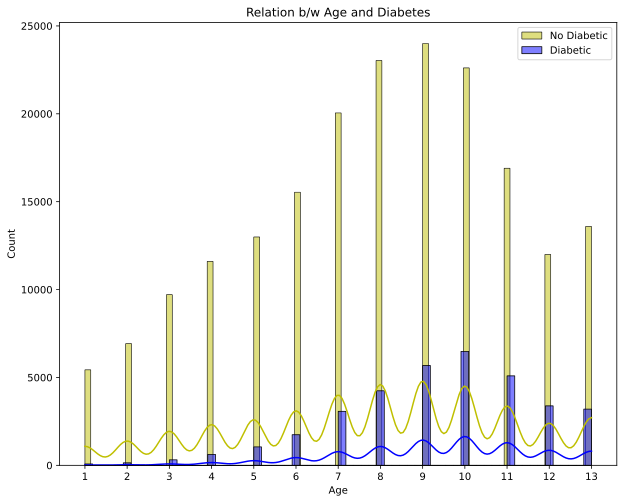

In [39]:
plt.figure(figsize=(10, 8))
sns.histplot(df.Age[df.Diabetes_binary == 0], color="y", label="No Diabetic" , kde = True )
sns.histplot(df.Age[df.Diabetes_binary == 1], color="b", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(df["Age"].unique())
plt.legend()

increase risk of diabetes with age

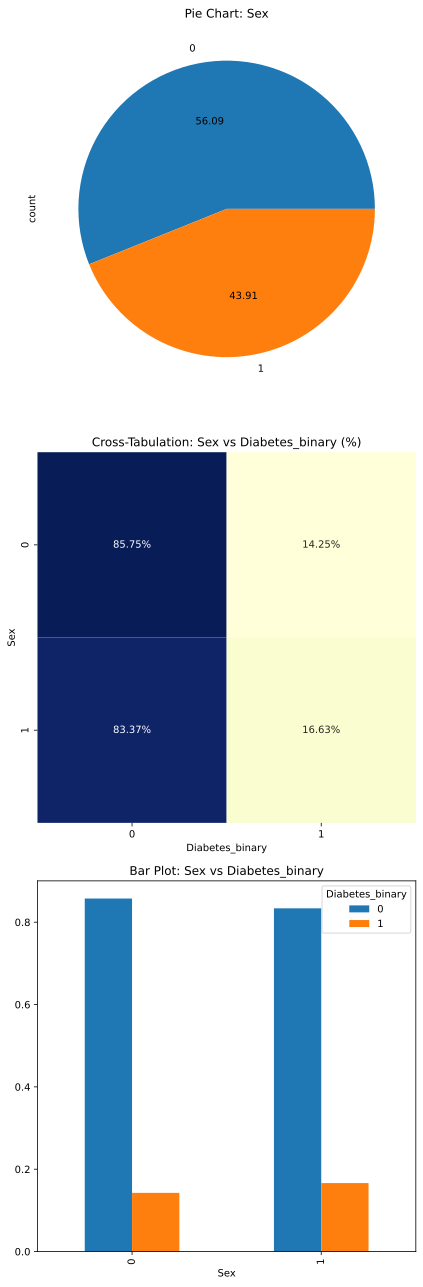

In [40]:
visualize_feature('Sex', df)

male and female have same chances of developing diabetes (according to the dataset)

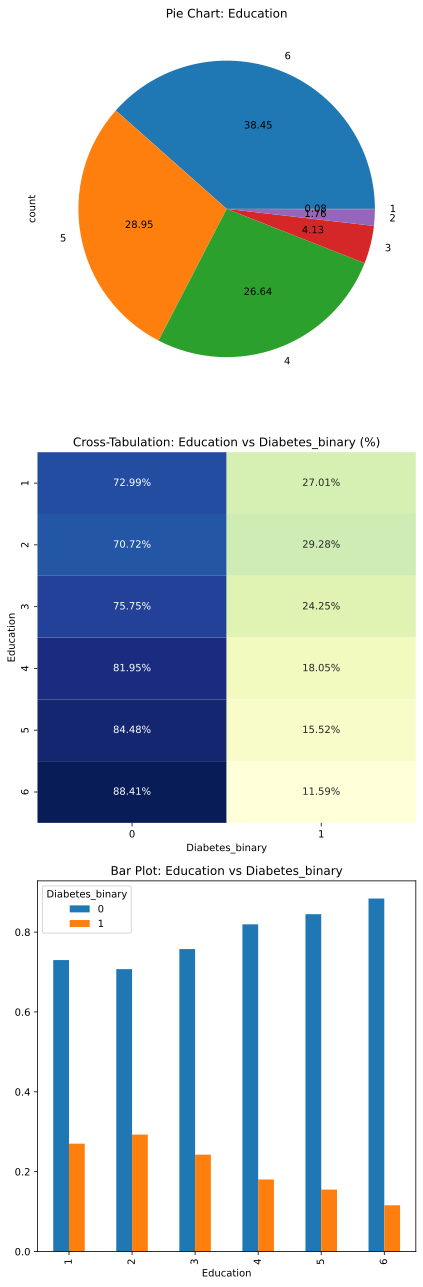

In [41]:
visualize_feature('Education' , df)

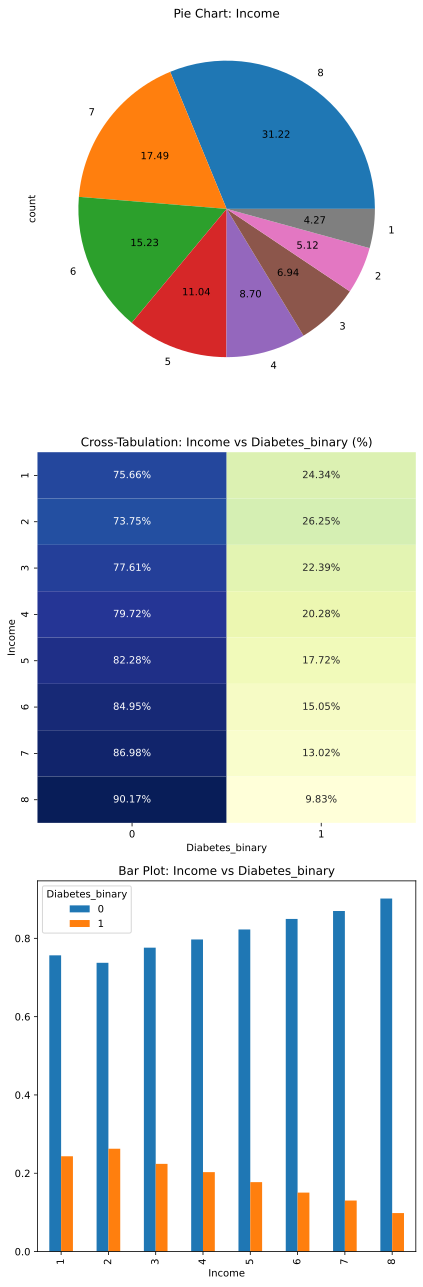

In [42]:
visualize_feature('Income' ,df)

age >= 45 are more vulnerable for diabetes

people with lower income > risk of diabetes. could be due to poor health insurance and not being able to afford health checkups

feature selection

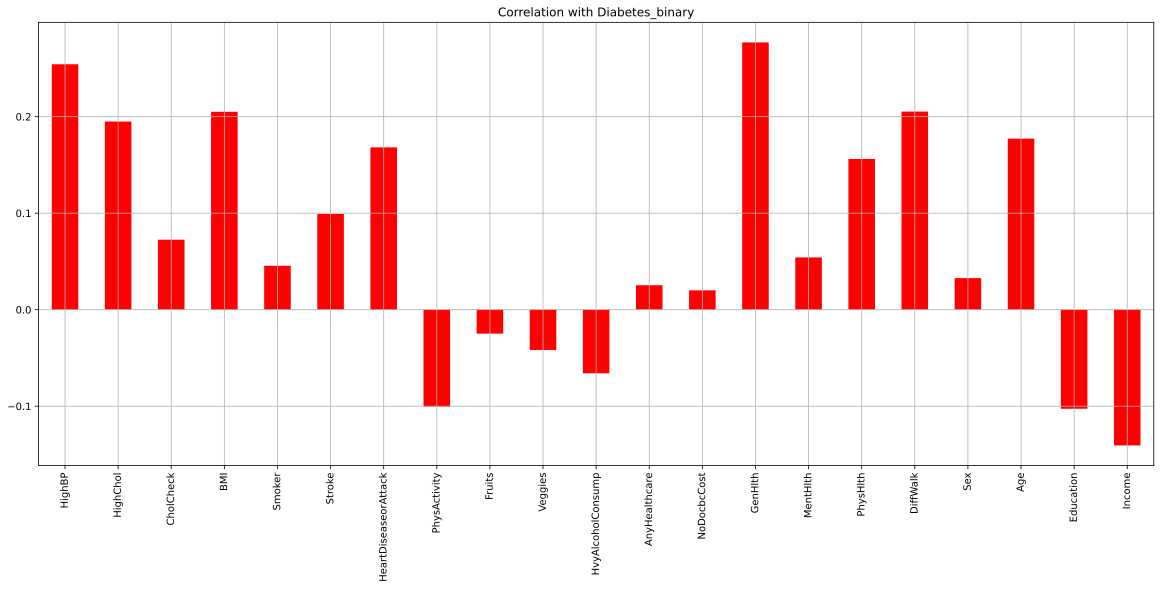

In [43]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Red");

Diabetes_binary's relation with other columns Through bar Graph Result:

1-Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2-HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

ANOVA Test

In [44]:
X = Original_data.iloc[:,1:]
Y = Original_data.iloc[:,0]

In [45]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif

In [46]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [47]:
pd.DataFrame(X_selected).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,40.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0


chi square

In [48]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [49]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


We will drop: "Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare"

In [50]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]

In [51]:
df.drop(colomns , axis= 1 ,inplace=True)

In [52]:
df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1,1,40,1,0,0,0,0,0,5,18,15,1,9,4,3
1,0,0,0,25,1,0,0,1,0,1,3,0,0,0,7,6,1
2,0,1,1,28,0,0,0,0,0,1,5,30,30,1,9,4,8
3,0,1,0,27,0,0,0,1,0,0,2,0,0,0,11,3,6
4,0,1,1,24,0,0,0,1,0,0,2,3,0,0,11,5,4


DATA Spliting

In [53]:
X=df.drop("Diabetes_binary",axis=1)
Y=df["Diabetes_binary"]

Handle Class imbalance

In [54]:
from imblearn.under_sampling import NearMiss

In [55]:
# Handling class imbalance using NearMiss to undersample the majority class
nm = NearMiss(version = 1 , n_neighbors = 10)
X_sm,Y_sm= nm.fit_resample(X,Y)

In [59]:
sample_size = 5000  # Or 3000 if too large

# Randomly sample indices
sample_indices = pd.Series(range(len(X_sm))).sample(n=sample_size, random_state=42).values

# Select rows by integer position using iloc
X_sm_sample = X_sm.iloc[sample_indices]
Y_sm_sample = Y_sm.iloc[sample_indices]

# Now split the smaller dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_sm_sample, Y_sm_sample, test_size=0.2, random_state=42)


DATA Scalling

In [60]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

MODELLING

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [62]:
#Logistic regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
cr = classification_report(Y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', cr)

Accuracy: 0.829
Confusion Matrix:
 [[456  25]
 [146 373]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84       481
           1       0.94      0.72      0.81       519

    accuracy                           0.83      1000
   macro avg       0.85      0.83      0.83      1000
weighted avg       0.85      0.83      0.83      1000



Use lazy predict to give us a hint of the best possible alghorithm

In [64]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from lazypredict.Supervised import CLASSIFIERS

In [65]:
# List of models to exclude
exclude_models = ['SVC', 'MLPClassifier', 'QuadraticDiscriminantAnalysis']

# Filter the classifiers (each item in CLASSIFIERS is a tuple: (name, class))
filtered_classifiers = [clf for name, clf in CLASSIFIERS if name not in exclude_models]

# Create LazyClassifier with filtered list
clf = LazyClassifier(
    verbose=1,
    ignore_warnings=True,
    custom_metric=None,
    classifiers=filtered_classifiers
)

# Fit the models
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
print(models)


  0%|          | 0/30 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.821, 'Balanced Accuracy': np.float64(0.8228341725451551), 'ROC AUC': np.float64(0.8228341725451552), 'F1 Score': 0.8208325866175326, 'Time taken': 0.3140718936920166}
{'Model': 'BaggingClassifier', 'Accuracy': 0.815, 'Balanced Accuracy': np.float64(0.8169016059189469), 'ROC AUC': np.float64(0.8169016059189469), 'F1 Score': 0.8147995726457251, 'Time taken': 0.18100404739379883}
{'Model': 'BernoulliNB', 'Accuracy': 0.798, 'Balanced Accuracy': np.float64(0.8021222645500102), 'ROC AUC': np.float64(0.8021222645500102), 'F1 Score': 0.7961611162311504, 'Time taken': 0.03526949882507324}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.831, 'Balanced Accuracy': np.float64(0.8355124800211505), 'ROC AUC': np.float64(0.8355124800211505), 'F1 Score': 0.8291481080296765, 'Time taken': 0.6111850738525391}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.775, 'Balanced Accuracy': np.float64(0.7744843554092109), 'ROC AUC': np.float64(0.7744843554092108),

HYPERPARAMETER TUNING for LGBM, Adaboost, Logistics regression


Imports and Helper Functions

In [74]:
import optuna
import lightgbm as lgb
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV  # For LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Function to visualize metrics
def visualize_metrics(y_test, y_pred, y_pred_proba, model_name):
    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['True 0', 'True 1'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # ROC Curve
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve: {model_name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    return auc_score


# Evaluation function
def evaluate_and_visualize(model, X_train, X_test, Y_train, Y_test, model_name):
    start_time = time.time()
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    # Some models need predict_proba, others need decision_function
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)
    time_taken = time.time() - start_time

    print(f"\n{model_name} Model Results")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Time Taken: {time_taken:.2f} seconds")
    print(f"Classification Report:\n{report}")

    auc_score = visualize_metrics(Y_test, y_pred, y_pred_proba, model_name)

    return accuracy, auc_score, time_taken




1. LightGBM hypermeter tuning

[I 2025-06-01 13:05:07,515] A new study created in memory with name: no-name-863ca98d-4bc3-4b36-87f0-7905f389914d
[I 2025-06-01 13:05:08,302] Trial 0 finished with value: 0.8074999999999999 and parameters: {'loss': 'modified_huber', 'penalty': 'l1', 'alpha': 6.586890150257329e-05}. Best is trial 0 with value: 0.8074999999999999.
[I 2025-06-01 13:05:08,413] Trial 1 finished with value: 0.8057500000000001 and parameters: {'loss': 'log_loss', 'penalty': 'l2', 'alpha': 0.06796163226876598}. Best is trial 0 with value: 0.8074999999999999.
[I 2025-06-01 13:05:08,558] Trial 2 finished with value: 0.817 and parameters: {'loss': 'log_loss', 'penalty': 'l2', 'alpha': 0.012006552030225182}. Best is trial 2 with value: 0.817.
[I 2025-06-01 13:05:08,696] Trial 3 finished with value: 0.8285 and parameters: {'loss': 'hinge', 'penalty': 'l2', 'alpha': 0.002835854822733291}. Best is trial 3 with value: 0.8285.
[I 2025-06-01 13:05:09,050] Trial 4 finished with value: 0.8225 and parameters: {'loss': 'log

Best SGDClassifier Parameters: {'loss': 'hinge', 'penalty': 'l2', 'alpha': 0.0004929411425400174}

SGDClassifier Model Results
Accuracy: 0.8200
Time Taken: 0.03 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       481
           1       0.98      0.66      0.79       519

    accuracy                           0.82      1000
   macro avg       0.86      0.83      0.82      1000
weighted avg       0.86      0.82      0.82      1000



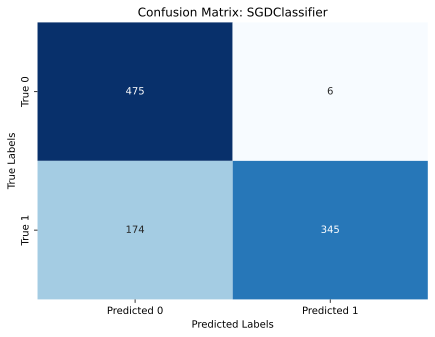

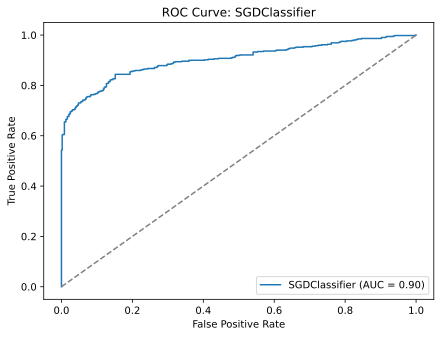

(0.82, np.float64(0.9025432724854691), 0.0330500602722168)

In [76]:
#LightGBM hypermeter tuning
def objective_sgd(trial):
    params = {
        'loss': trial.suggest_categorical('loss', ['hinge', 'log_loss', 'modified_huber']),
        'penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
        'max_iter': 1000,
        'tol': 1e-3
    }
    model = SGDClassifier(**params)
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return score

study_sgd = optuna.create_study(direction='maximize')
study_sgd.optimize(objective_sgd, n_trials=20)
print("Best SGDClassifier Parameters:", study_sgd.best_params)

best_params_sgd = study_sgd.best_params
sgd_model = SGDClassifier(**best_params_sgd)
evaluate_and_visualize(sgd_model, X_train, X_test, Y_train, Y_test, "SGDClassifier")

2. SGDClassifier Hypermeter tuning


[I 2025-06-01 13:05:47,628] A new study created in memory with name: no-name-b58d1d28-0d4e-4428-b9cc-401695fa56b2
[I 2025-06-01 13:05:47,705] Trial 0 finished with value: 0.8184999999999999 and parameters: {'loss': 'modified_huber', 'penalty': 'l2', 'alpha': 0.07055328993761806}. Best is trial 0 with value: 0.8184999999999999.
[I 2025-06-01 13:05:47,780] Trial 1 finished with value: 0.8087500000000001 and parameters: {'loss': 'hinge', 'penalty': 'l2', 'alpha': 0.048506340207776895}. Best is trial 0 with value: 0.8184999999999999.
[I 2025-06-01 13:05:48,030] Trial 2 finished with value: 0.753 and parameters: {'loss': 'modified_huber', 'penalty': 'l2', 'alpha': 1.2820259538808547e-05}. Best is trial 0 with value: 0.8184999999999999.
[I 2025-06-01 13:05:48,090] Trial 3 finished with value: 0.80975 and parameters: {'loss': 'hinge', 'penalty': 'l2', 'alpha': 0.04406998375582755}. Best is trial 0 with value: 0.8184999999999999.
[I 2025-06-01 13:05:48,895] Trial 4 finished with value: 0.80575

Best SGDClassifier Parameters: {'loss': 'log_loss', 'penalty': 'elasticnet', 'alpha': 0.00013390314283926442}

SGDClassifier Model Results
Accuracy: 0.8300
Time Taken: 0.03 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       481
           1       0.89      0.77      0.82       519

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



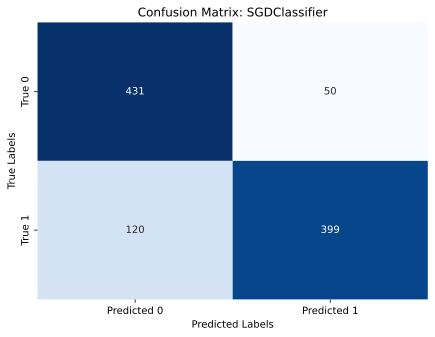

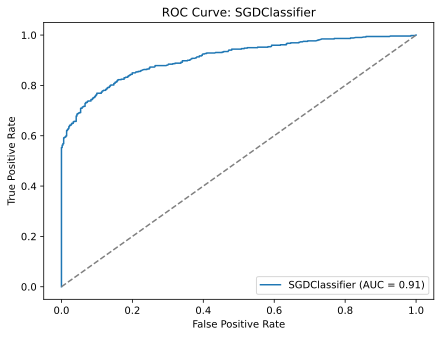

(0.83, np.float64(0.9077688181734425), 0.03144073486328125)

In [77]:
def objective_sgd(trial):
    params = {
        'loss': trial.suggest_categorical('loss', ['hinge', 'log_loss', 'modified_huber']),
        'penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
        'max_iter': 1000,
        'tol': 1e-3
    }
    model = SGDClassifier(**params)
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return score

study_sgd = optuna.create_study(direction='maximize')
study_sgd.optimize(objective_sgd, n_trials=20)
print("Best SGDClassifier Parameters:", study_sgd.best_params)

best_params_sgd = study_sgd.best_params
sgd_model = SGDClassifier(**best_params_sgd)
evaluate_and_visualize(sgd_model, X_train, X_test, Y_train, Y_test, "SGDClassifier")


LinearSVC Hypermeter Tuning


[I 2025-06-01 13:12:21,985] A new study created in memory with name: no-name-e4ce8371-efb5-47bf-92a3-936d3a3ef10d
[I 2025-06-01 13:12:31,755] Trial 0 finished with value: 0.8324999999999999 and parameters: {'C': 14.256285332146613}. Best is trial 0 with value: 0.8324999999999999.
[I 2025-06-01 13:12:32,622] Trial 1 finished with value: 0.8332500000000002 and parameters: {'C': 0.6798101799359022}. Best is trial 1 with value: 0.8332500000000002.
[I 2025-06-01 13:12:37,591] Trial 2 finished with value: 0.8322499999999999 and parameters: {'C': 4.131374186725906}. Best is trial 1 with value: 0.8332500000000002.
[I 2025-06-01 13:12:37,632] Trial 3 finished with value: 0.8147500000000001 and parameters: {'C': 0.003352963906714964}. Best is trial 1 with value: 0.8332500000000002.
[I 2025-06-01 13:12:37,677] Trial 4 finished with value: 0.81875 and parameters: {'C': 0.006240071255863545}. Best is trial 1 with value: 0.8332500000000002.
[I 2025-06-01 13:12:37,717] Trial 5 finished with value: 0.

Best LinearSVC Parameters: {'C': 0.12563889941970124}

LinearSVC (Calibrated) Model Results
Accuracy: 0.8290
Time Taken: 0.51 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       481
           1       0.94      0.72      0.81       519

    accuracy                           0.83      1000
   macro avg       0.85      0.83      0.83      1000
weighted avg       0.85      0.83      0.83      1000



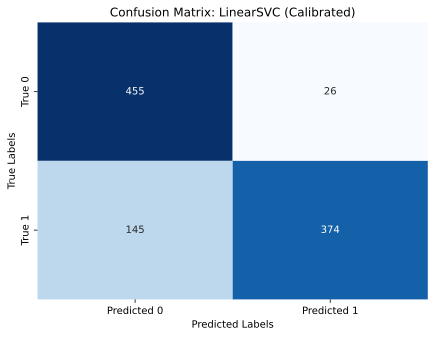

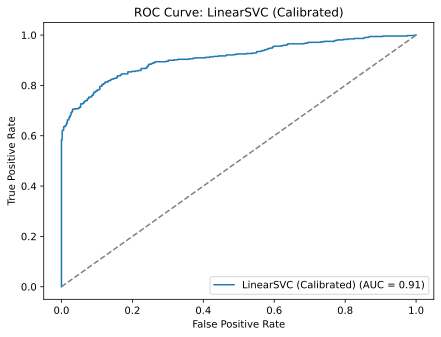

(0.829, np.float64(0.9093491001005454), 0.5083537101745605)

In [80]:
def objective_lsvc(trial):
    params = {
        'C': trial.suggest_loguniform('C', 1e-3, 1e3),
        'penalty': 'l2',
        'loss': 'squared_hinge',
        'max_iter': 10000,
        'dual': True
    }
    model = LinearSVC(**params)
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return score

study_lsvc = optuna.create_study(direction='maximize')
study_lsvc.optimize(objective_lsvc, n_trials=20)
print("Best LinearSVC Parameters:", study_lsvc.best_params)

# Calibrating LinearSVC to get probability estimates
best_params_lsvc = study_lsvc.best_params
svc_raw = LinearSVC(**best_params_lsvc)
svc_model = CalibratedClassifierCV(svc_raw, method='sigmoid')  # Adds probability prediction
evaluate_and_visualize(svc_model, X_train, X_test, Y_train, Y_test, "LinearSVC (Calibrated)")

Final model selected - LGBM

In [81]:
from lightgbm import LGBMClassifier
final_model = LGBMClassifier(random_state=42)
final_model.fit(X_train, Y_train)

# Predict and evaluate on the test set
y_pred = final_model.predict(X_test)
print("\nLGBMClassifier evaluation:\n")
print(classification_report(Y_test, y_pred))

[LightGBM] [Info] Number of positive: 2018, number of negative: 1982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504500 -> initscore=0.018000
[LightGBM] [Info] Start training from score 0.018000

LGBMClassifier evaluation:

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       481
           1       0.90      0.78      0.84       519

    accuracy                           0.84      1000
   macro avg       0.85      0.85      0.84      1000
weighted avg       0.85      0.84      0.84      1000



In [82]:
def get_user_input():
    # Get feature input from the user
    print("Please provide the following features:")
    HighBP = float(input("High Blood Pressure (0 or 1): "))
    HighChol = float(input("High Cholesterol (0 or 1): "))
    #CholCheck = float(input("Cholesterol Check (0 or 1): "))
    BMI = float(input("BMI: "))
    Smoker = float(input("Smoker (0 or 1): "))
    Stroke = float(input("Stroke (0 or 1): "))
    HeartDiseaseorAttack = float(input("Heart Disease or Attack (0 or 1): "))
    PhysActivity = float(input("Physical Activity (0 or 1): "))
    #Fruits = float(input("Fruits intake (0 or 1): "))
    #Veggies = float(input("Vegetable intake (0 or 1): "))
    HvyAlcoholConsump = float(input("Heavy Alcohol Consumption (0 or 1): "))
    #AnyHealthcare = float(input("Any Healthcare (0 or 1): "))
    NoDocbcCost = float(input("No Doctor because of Cost (0 or 1): "))
    GenHlth = float(input("General Health (1 to 5): "))
    MentHlth = float(input("Mental Health (0 to 30): "))
    PhysHlth = float(input("Physical Health (0 to 30): "))
    DiffWalk = float(input("Difficulty Walking (0 or 1): "))
    #Sex = float(input("Sex (0 for female, 1 for male): "))
    Age = float(input("Age: "))
    Education = float(input("Education Level: 0 to 6 "))
    Income = float(input("Income Level: 0 to 8 "))

    # Return the features as a DataFrame
    features = pd.DataFrame({
        'HighBP': [HighBP], 'HighChol': [HighChol],
        'BMI': [BMI], 'Smoker': [Smoker], 'Stroke': [Stroke], 'HeartDiseaseorAttack': [HeartDiseaseorAttack],
        'PhysActivity': [PhysActivity],
        'HvyAlcoholConsump': [HvyAlcoholConsump],  'NoDocbcCost': [NoDocbcCost],
        'GenHlth': [GenHlth], 'MentHlth': [MentHlth], 'PhysHlth': [PhysHlth], 'DiffWalk': [DiffWalk],
         'Age': [Age], 'Education': [Education], 'Income': [Income]
    })

    return features

# Use the model to predict based on user input
def make_prediction():
    user_data = get_user_input()
    prediction =final_model.predict(user_data)
    if prediction[0] == 1:
        print('Diabetic')
    else:
        print('No diabetes')


# Make a prediction
make_prediction()

Please provide the following features:
High Blood Pressure (0 or 1): 0
High Cholesterol (0 or 1): 0
BMI: 31.2
Smoker (0 or 1): 0
Stroke (0 or 1): 0
Heart Disease or Attack (0 or 1): 0
Physical Activity (0 or 1): 0
Heavy Alcohol Consumption (0 or 1): 0
No Doctor because of Cost (0 or 1): 1
General Health (1 to 5): 3
Mental Health (0 to 30): 20
Physical Health (0 to 30): 20
Difficulty Walking (0 or 1): 0
Age: 24
Education Level: 0 to 6 5
Income Level: 0 to 8 5
Diabetic
